Making plots for my how to build an SED talk.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = 'draft_hlsp/gj_367/'
hlsp = glob.glob('{}*.fits'.format(path))

In [3]:
hlsp

['draft_hlsp/gj_367/hlsp_muscles_hst_stis_gj_367_g430l_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_model_lya_gj_367_na_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_hst_stis_gj_367_g140m_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_multi_multi_gj_367_broadband_v1_const-res-sed.fits',
 'draft_hlsp/gj_367/hlsp_muscles_multi_multi_gj_367_broadband_v1_var-res-sed.fits',
 'draft_hlsp/gj_367/hlsp_muscles_hst_cos_gj_367_g130m_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_model_apec_gj_367_na_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_model_phx_gj_367_na_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_model_dem_gj_367_na_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_hst_stis_gj_367_g230l_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_multi_multi_gj_367_broadband_v1_adapt-const-res-sed.fits',
 'draft_hlsp/gj_367/hlsp_muscles_xmm_epic_gj367_na_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscl

In [4]:
import mplcyberpunk
plt.style.use("cyberpunk")

In [5]:
sed = fits.getdata(hlsp[3], 1)

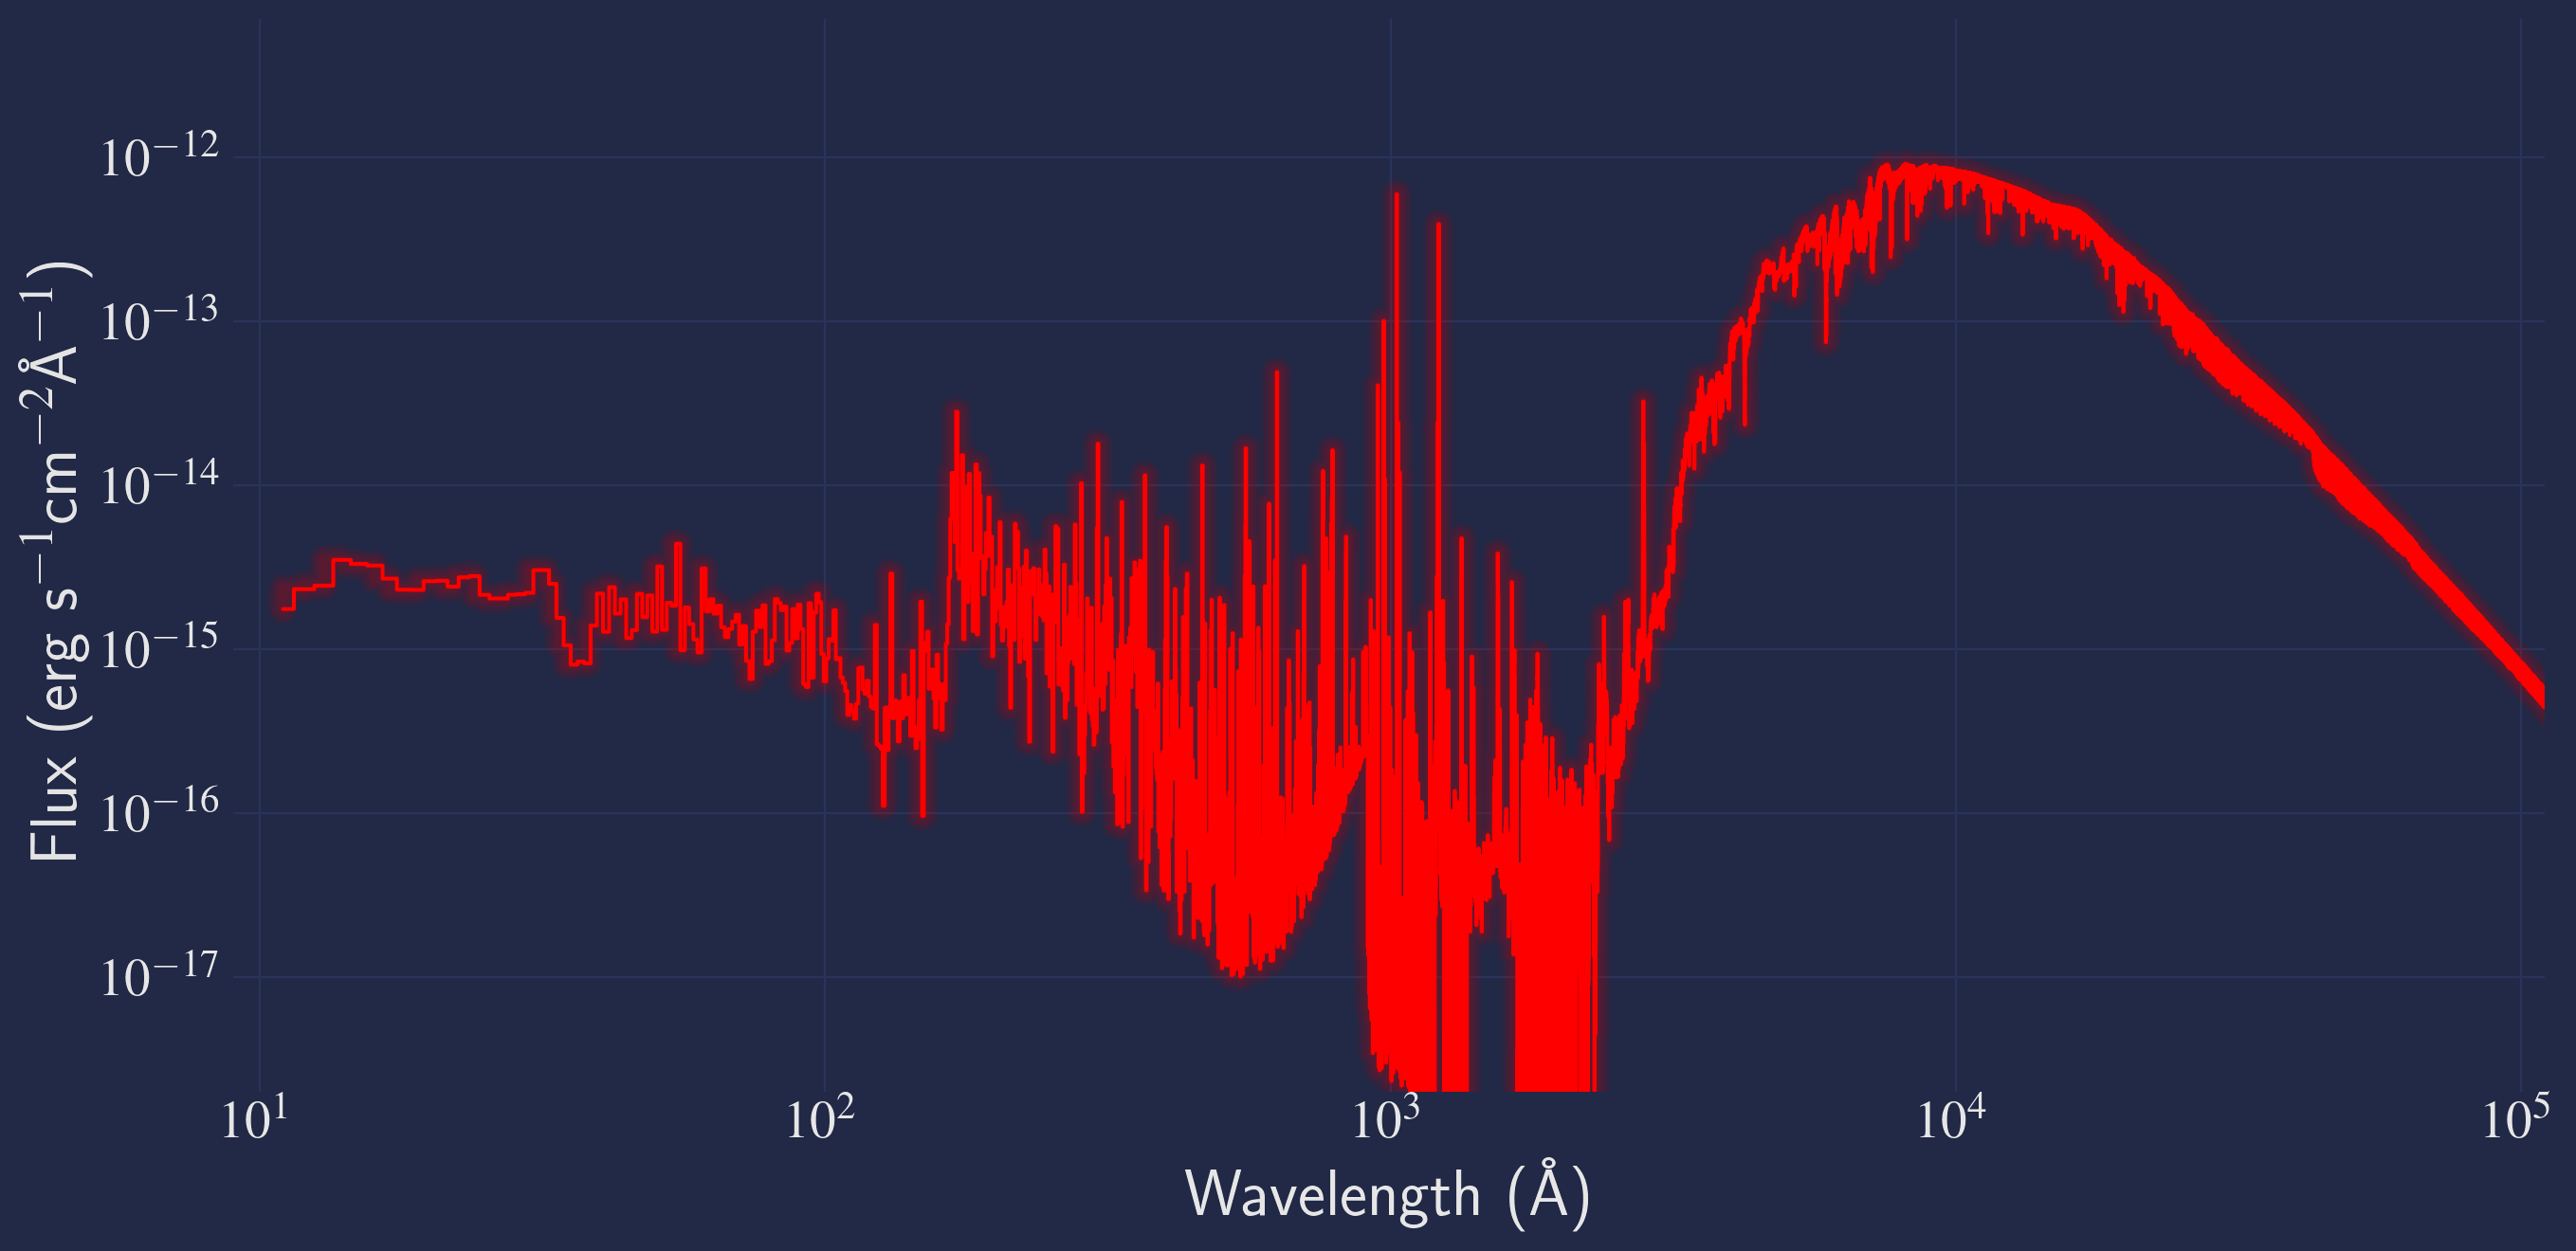

In [31]:
fig, ax = plt.subplots(figsize=(14, 7))

# ax.plot(sed['WAVELENGTH'], sed['FLUX'], c='C4')
ax.step(sed['WAVELENGTH'], sed['FLUX'], c='C4', where='mid')

ax.set_yscale('log')
ax.set_xscale('log')

# ax.axvline(110, ls='--')
# ax.axvline(900, ls='--')
# ax.axvline(4000, ls='--')



bar_y = 2e-12
label_y = bar_y*1.5
e_y = bar_y *0.3
# ax.annotate('X-ray' ,(20, label_y), size=25)
# ax.annotate('EUV' ,(250, label_y), size=25)
# ax.annotate('Ultraviolet' ,(1200, label_y), size=25)
# ax.annotate('Optical/IR' ,(6000, label_y), size=25)

# plt.legend(fontsize=25, loc=4,frameon=True)

# mplcyberpunk.add_glow_effects()
mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()
ax.set_ylim(2e-18, 7e-12)
ax.set_xlim(9, 1.1e5)
ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
# ax.set_title('GJ 367', size=30)
fig.tight_layout()
fig.savefig('plots/aas_talk/gj367_sed_no_labels.png')


2889.8137795894413 5698.308868665037
1214.5087936354232 1216.9550644445499
1194.3834974320055 1248.753833977949
1065.0 1366.9913
5.000441551208496 119.83476257324219
501.0 9995000.0
1.0 1500.0
1574.1781519961073 3158.1913940611666
10.1492 34.69384


(1e-18, 1e-12)

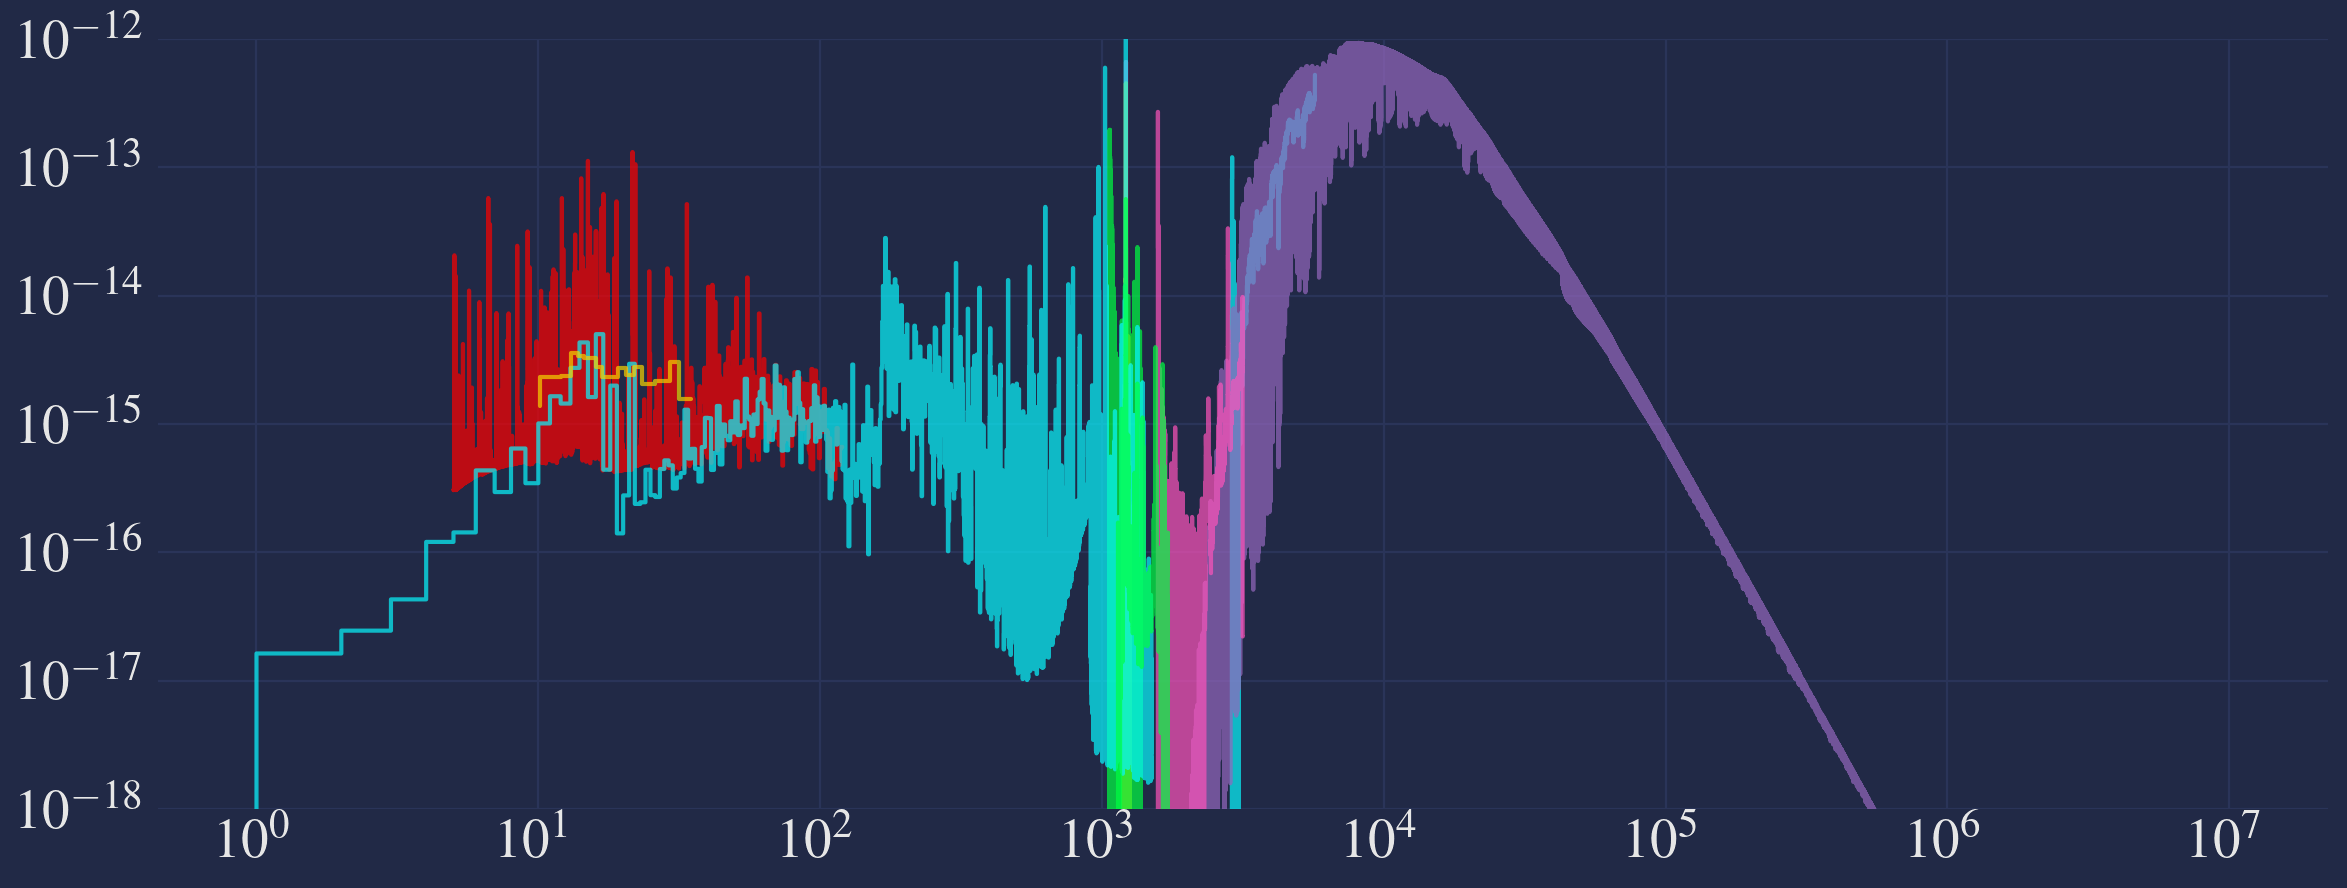

In [7]:
fig, ax = plt.subplots()
for spec in hlsp:
    if 'multi' not in spec:
        data = fits.getdata(spec, 1)
        hdr = fits.getheader(spec, 0)
        ax.step(data['WAVELENGTH'], data['FLUX']*hdr['NORMFAC'], alpha = 0.7)
        print(data['WAVELENGTH'][0], data['WAVELENGTH'][-1])
        
        
proxy_path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_hst_stis_gj674_g140l_v24_component-spec.fits'
data = fits.getdata(proxy_path, 1)
d_prox = 4.55
d_star = 9.42
scale = (d_prox/d_star)**2
ax.step(data['WAVELENGTH'], data['FLUX']*scale, alpha = 0.7)


ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-18, 1e-12)


Text(0, 0.5, 'Flux (erg s$^{-1}$cm$^{-2}$\\AA$^{-1}$)')

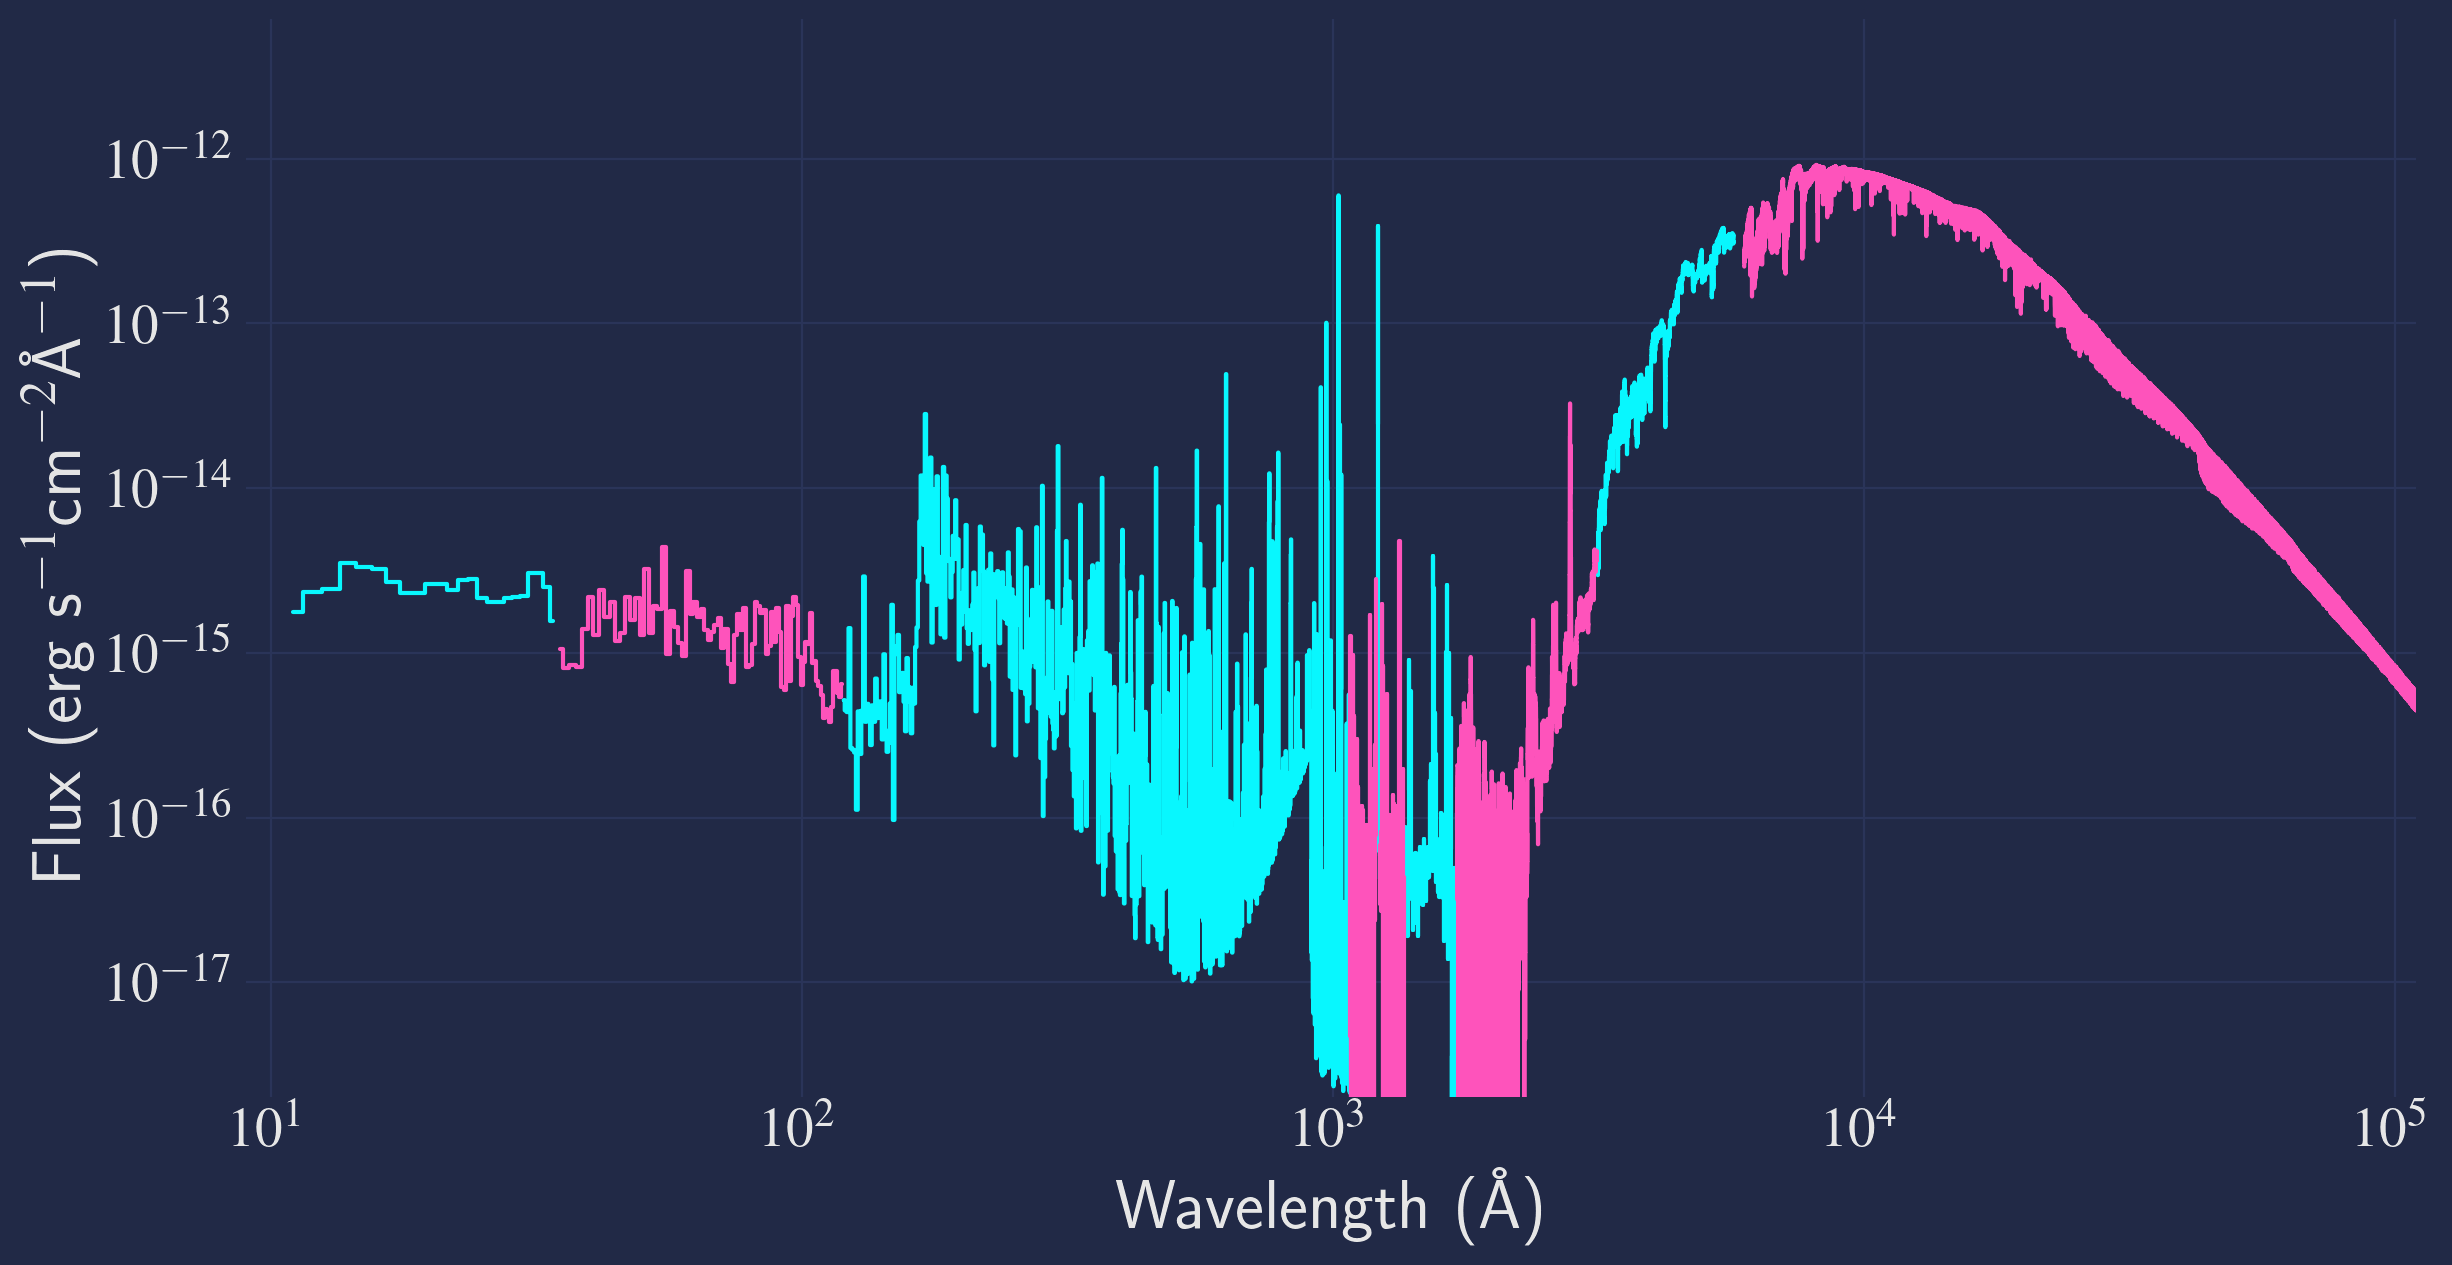

In [8]:
# trims = {'G430L':[3151, 5690], 'G230L':[1715, 3150 ]}
# trims={'G130M':[1080, 1363]}
# [1367, 1715],
fig, ax = plt.subplots(figsize=(14, 7))

ranges = [[10, 35], [35, 120], [120, 1080], [1080, 1210],[1210, 1230], 
          [1230, 1367], [1367, 1715], [1715, 3150], [3151, 5690], [5960, 1e6]]

for comp in ranges[0::2]:
    mask = (sed['WAVELENGTH'] >= comp[0]) & (sed['WAVELENGTH'] < comp[1])
    ax.step(sed['WAVELENGTH'][mask], sed['FLUX'][mask], where='mid', c='C0')
    
for comp in ranges[1::2]:
    mask = (sed['WAVELENGTH'] >= comp[0]) & (sed['WAVELENGTH'] < comp[1])
    ax.step(sed['WAVELENGTH'][mask], sed['FLUX'][mask], where='mid', c='C1')
    
ax.set_yscale('log')
ax.set_xscale('log')

# mplcyberpunk.add_glow_effects()
# mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()
ax.set_ylim(2e-18, 7e-12)
ax.set_xlim(9, 1.1e5)
ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)

# fig.savefig('plots/aas_talk/split_noscale.png')

    

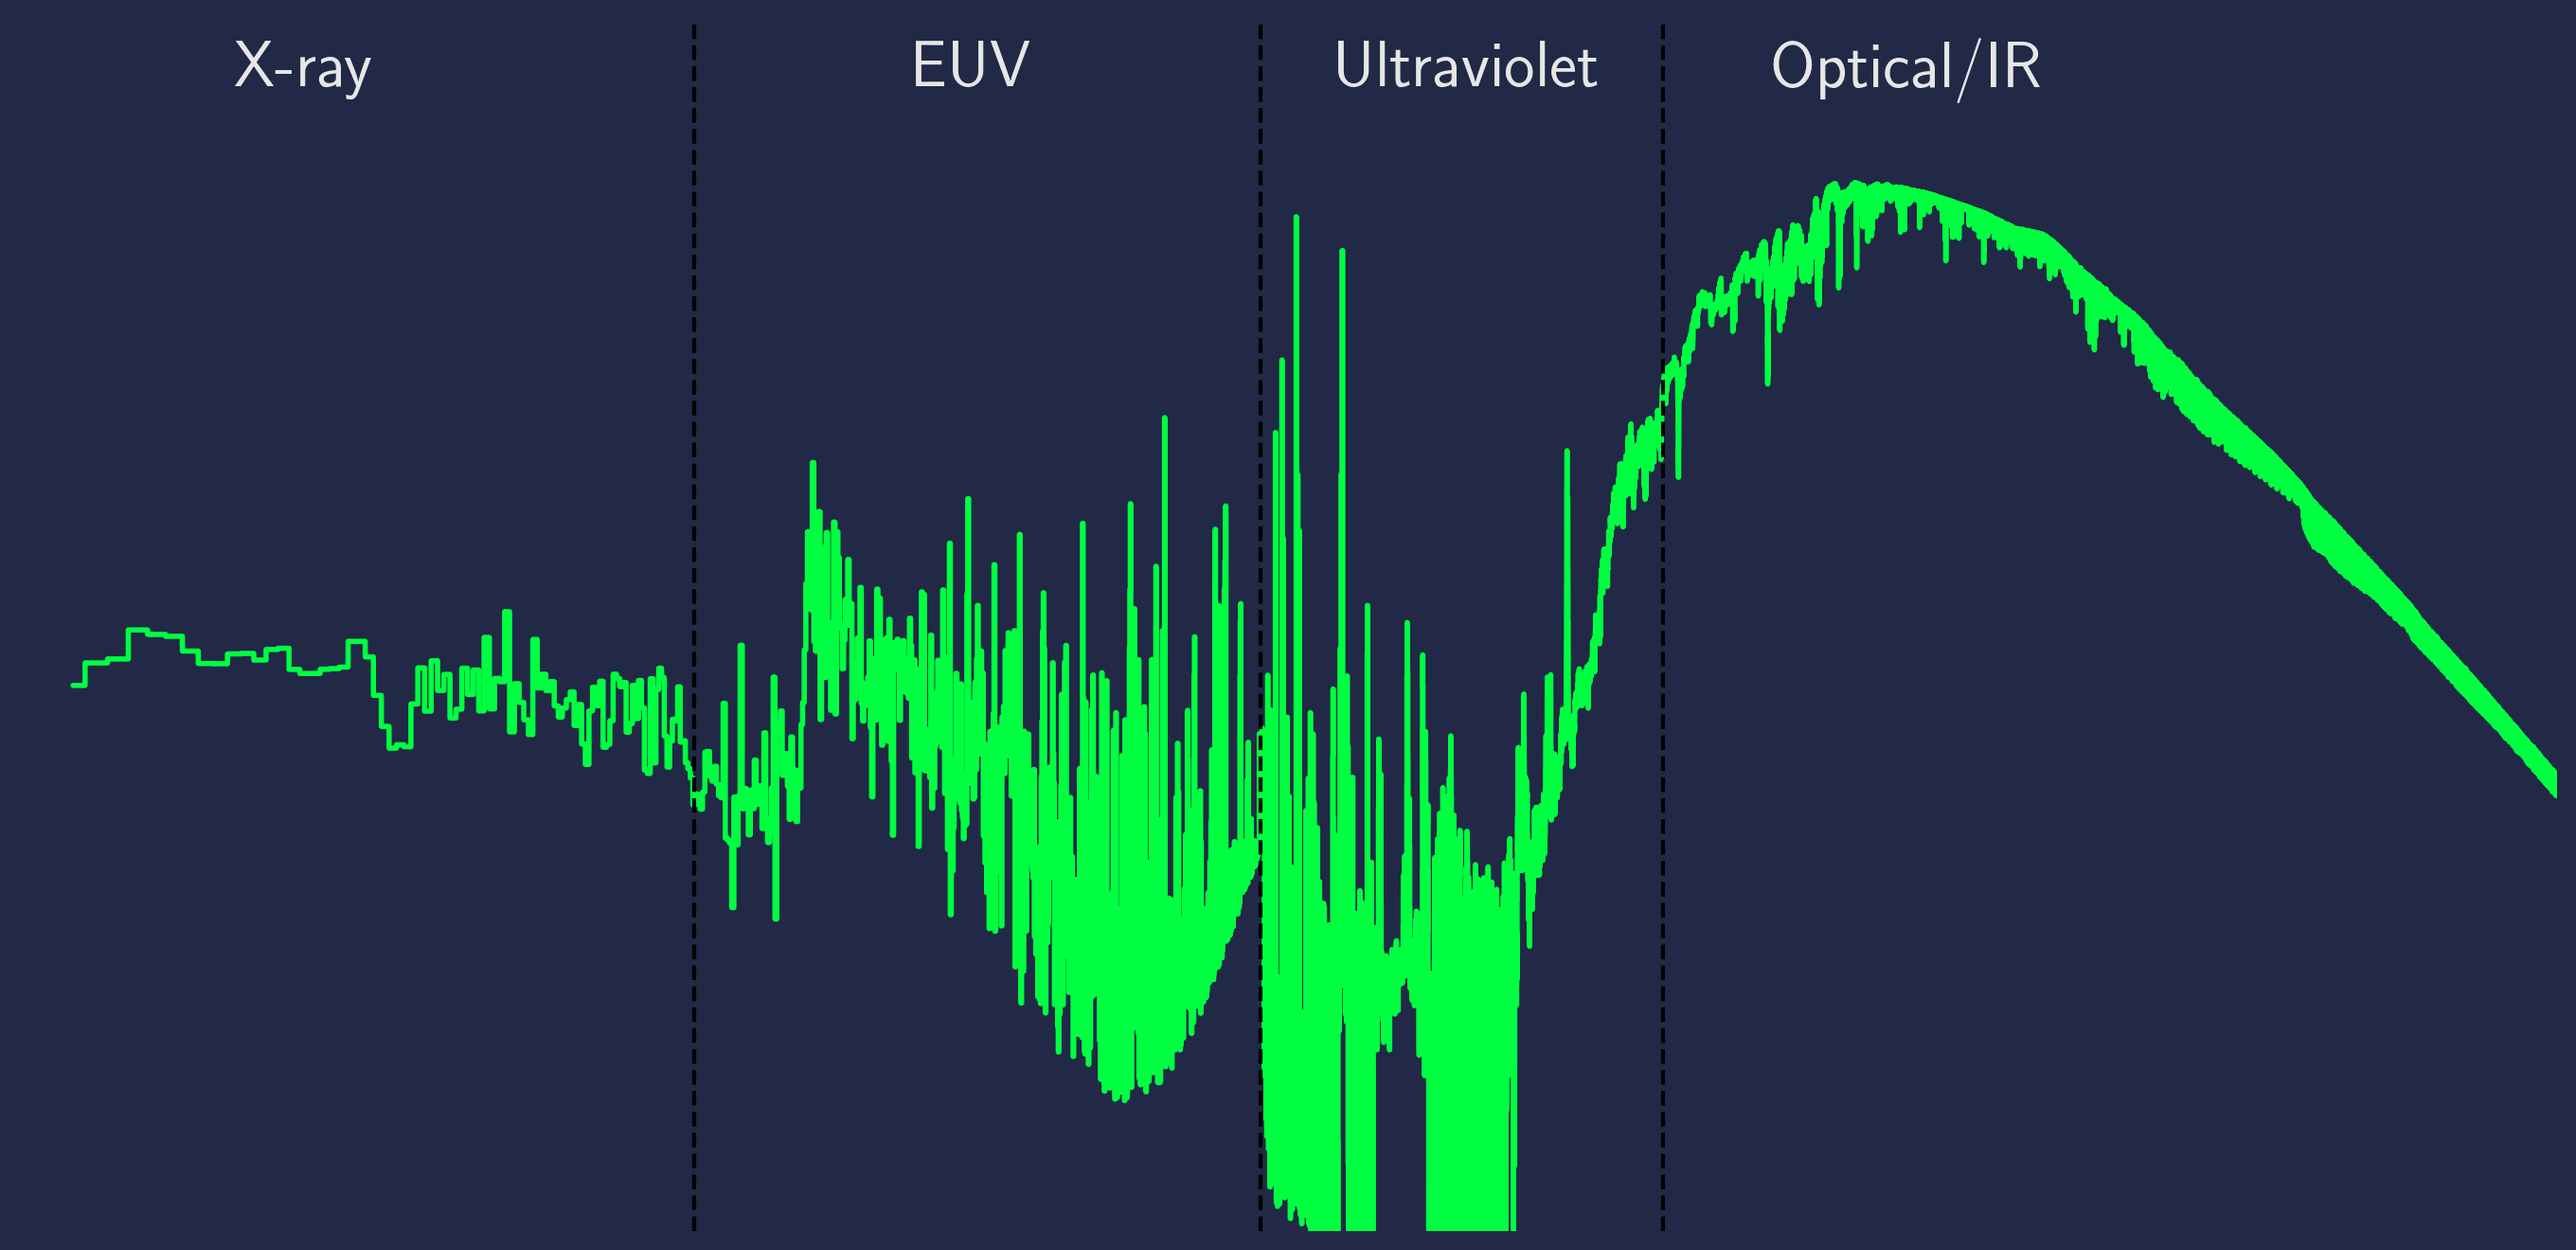

In [9]:
fig, ax = plt.subplots(figsize=(14, 7))

# ax.plot(sed['WAVELENGTH'], sed['FLUX'], c='C4')
ax.step(sed['WAVELENGTH'], sed['FLUX'], c='C3', where='mid', lw=2)

ax.set_yscale('log')
ax.set_xscale('log')

ax.axvline(110, ls='--', c='k')
ax.axvline(900, ls='--', c='k')
ax.axvline(4000, ls='--', c='k')



# bar_y = 2e-12
# label_y = bar_y*1.5
# e_y = bar_y *0.3
ax.annotate('X-ray' ,(20, label_y), size=25)
ax.annotate('EUV' ,(250, label_y), size=25)
ax.annotate('Ultraviolet' ,(1200, label_y), size=25)
ax.annotate('Optical/IR' ,(6000, label_y), size=25)

# # plt.legend(fontsize=25, loc=4,frameon=True)

# # mplcyberpunk.add_glow_effects()
# # mplcyberpunk.make_lines_glow()
# # mplcyberpunk.add_underglow()
ax.set_ylim(2e-18, 7e-12)
ax.set_xlim(9, 1.1e5)
# ax.set_xlabel('Wavelength (\AA)', size=25)
# ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
ax.axis('off')
# ax.set_title('GJ 367', size=30)
fig.tight_layout()
# fig.savefig('plots/aas_talk/gj367_sed_plain.png', facecolor='none')


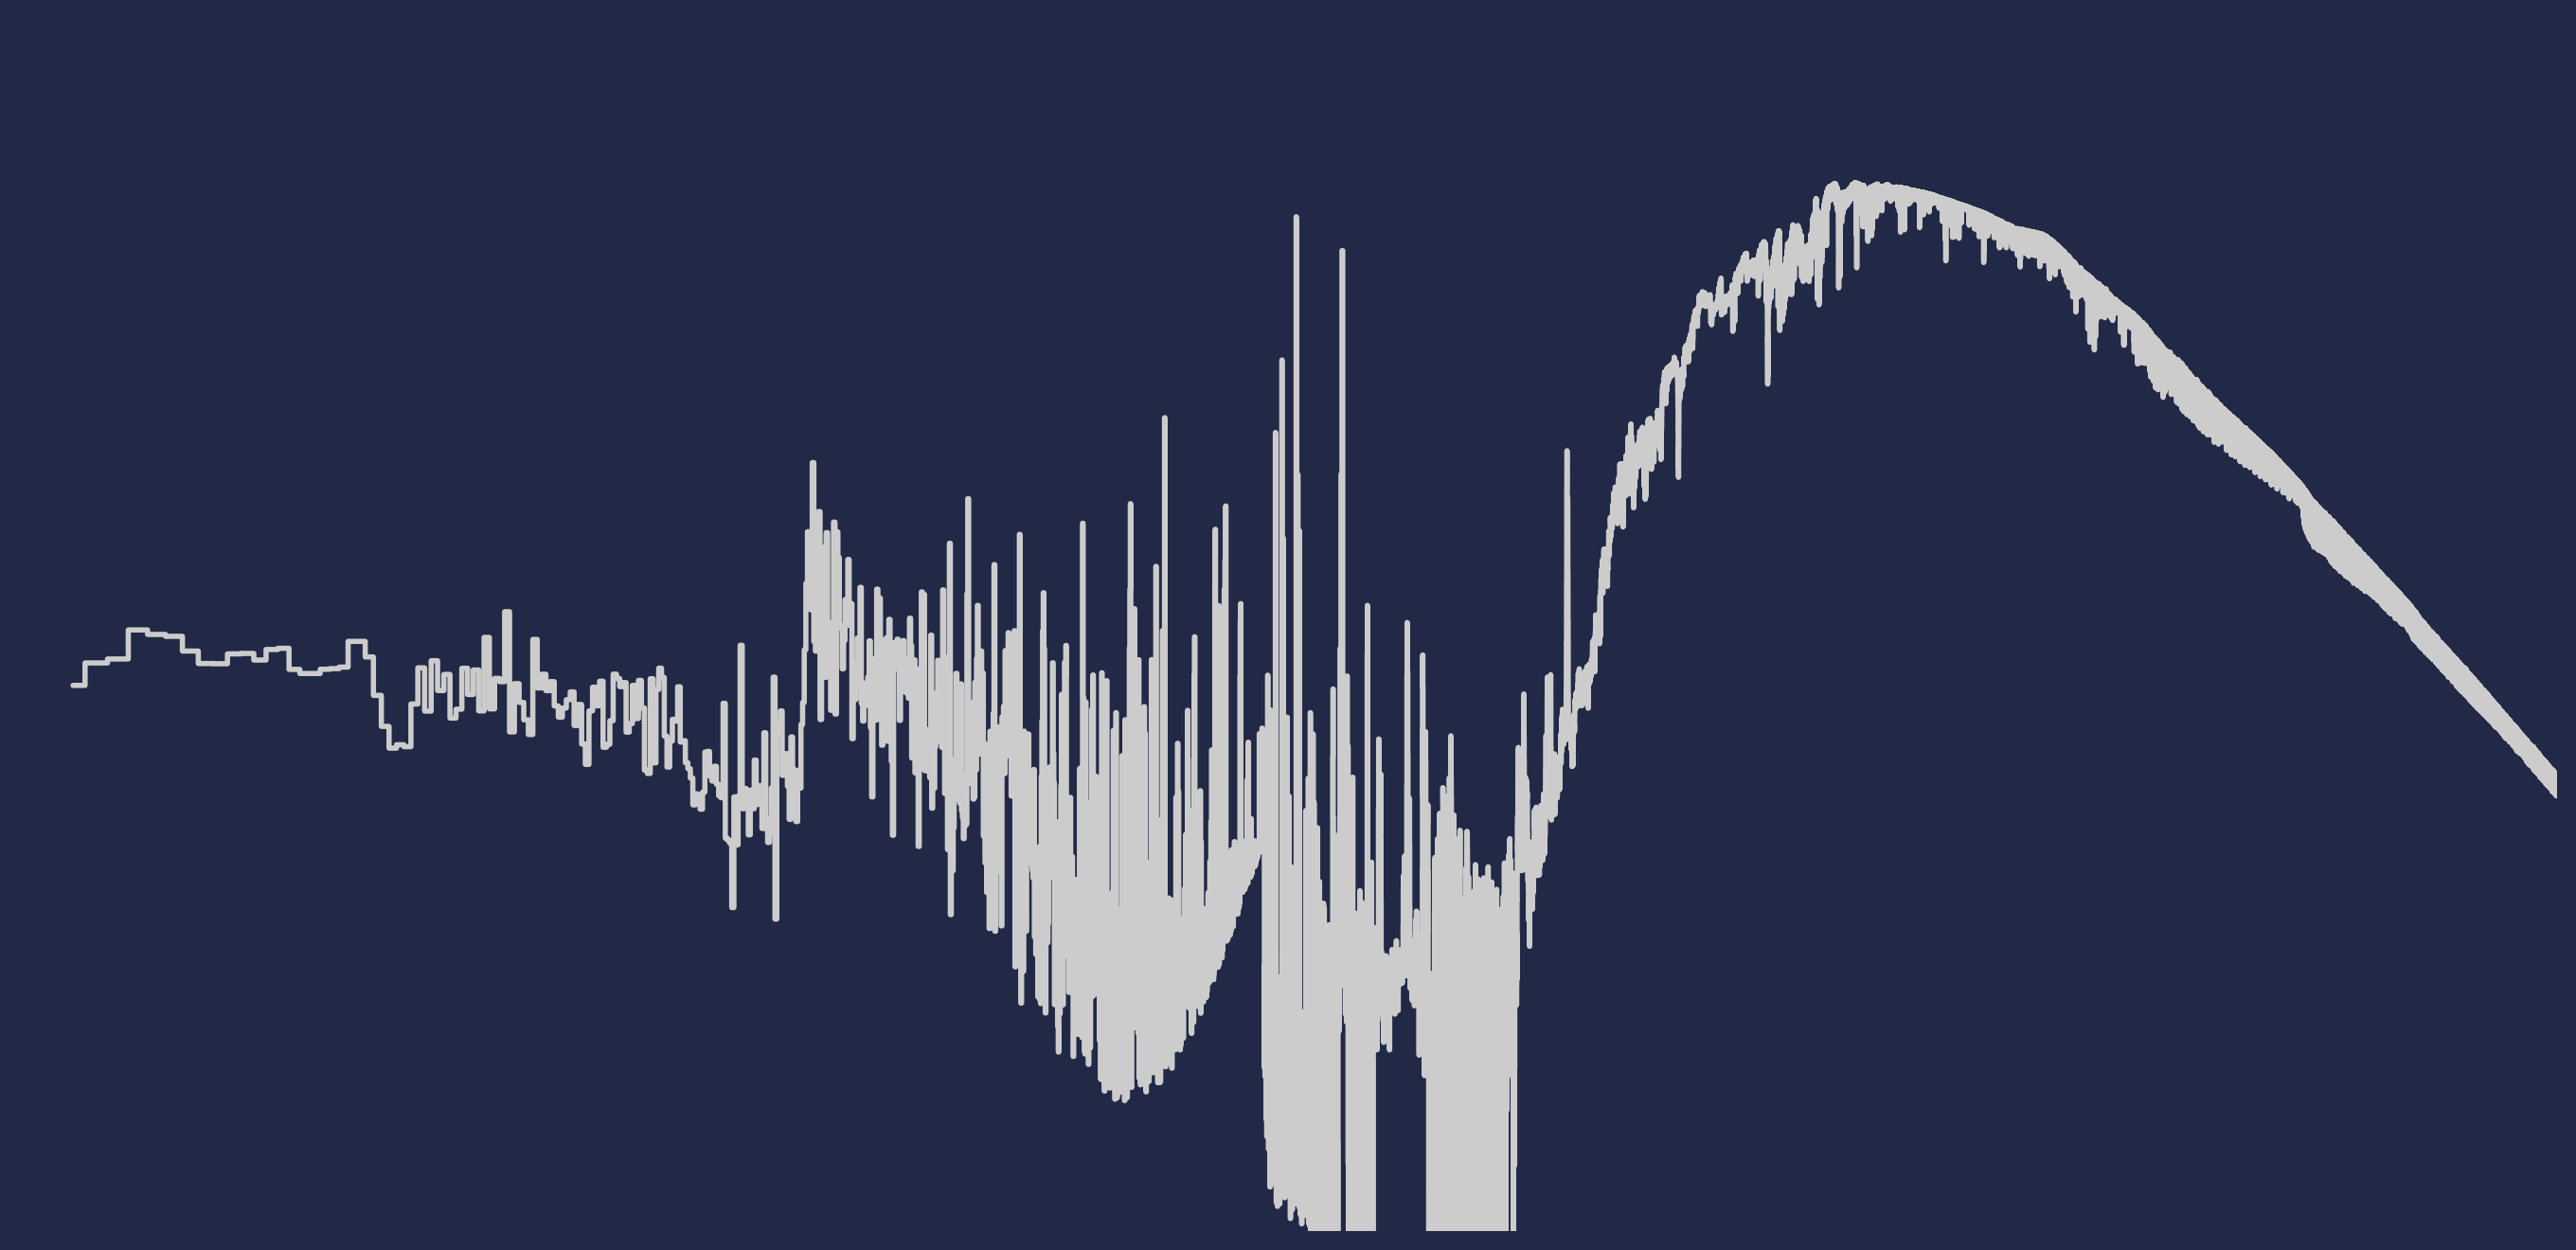

In [10]:
fig, ax = plt.subplots(figsize=(14, 7))

# ax.plot(sed['WAVELENGTH'], sed['FLUX'], c='C4')
ax.step(sed['WAVELENGTH'], sed['FLUX'], c='0.8', where='mid', lw=2)

ax.set_yscale('log')
ax.set_xscale('log')

# ax.axvline(110, ls='--', c='k')
# ax.axvline(900, ls='--', c='k')
# ax.axvline(4000, ls='--', c='k')



# # bar_y = 2e-12
# # label_y = bar_y*1.5
# # e_y = bar_y *0.3
# ax.annotate('X-ray' ,(20, label_y), size=25)
# ax.annotate('EUV' ,(250, label_y), size=25)
# ax.annotate('Ultraviolet' ,(1200, label_y), size=25)
# ax.annotate('Optical/IR' ,(6000, label_y), size=25)

# # plt.legend(fontsize=25, loc=4,frameon=True)

# # mplcyberpunk.add_glow_effects()
# # mplcyberpunk.make_lines_glow()
# # mplcyberpunk.add_underglow()
ax.set_ylim(2e-18, 7e-12)
ax.set_xlim(9, 1.1e5)
# ax.set_xlabel('Wavelength (\AA)', size=25)
# ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
ax.axis('off')
# ax.set_title('GJ 367', size=30)
fig.tight_layout()
# fig.savefig('plots/aas_talk/gj367_sed_see_through.png', facecolor='none')


Observations

In [15]:
obs = ['draft_hlsp/gj_367/hlsp_muscles_hst_stis_gj_367_g430l_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_hst_stis_gj_367_g140m_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_hst_cos_gj_367_g130m_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_hst_stis_gj_367_g230l_v1_component-spec.fits']

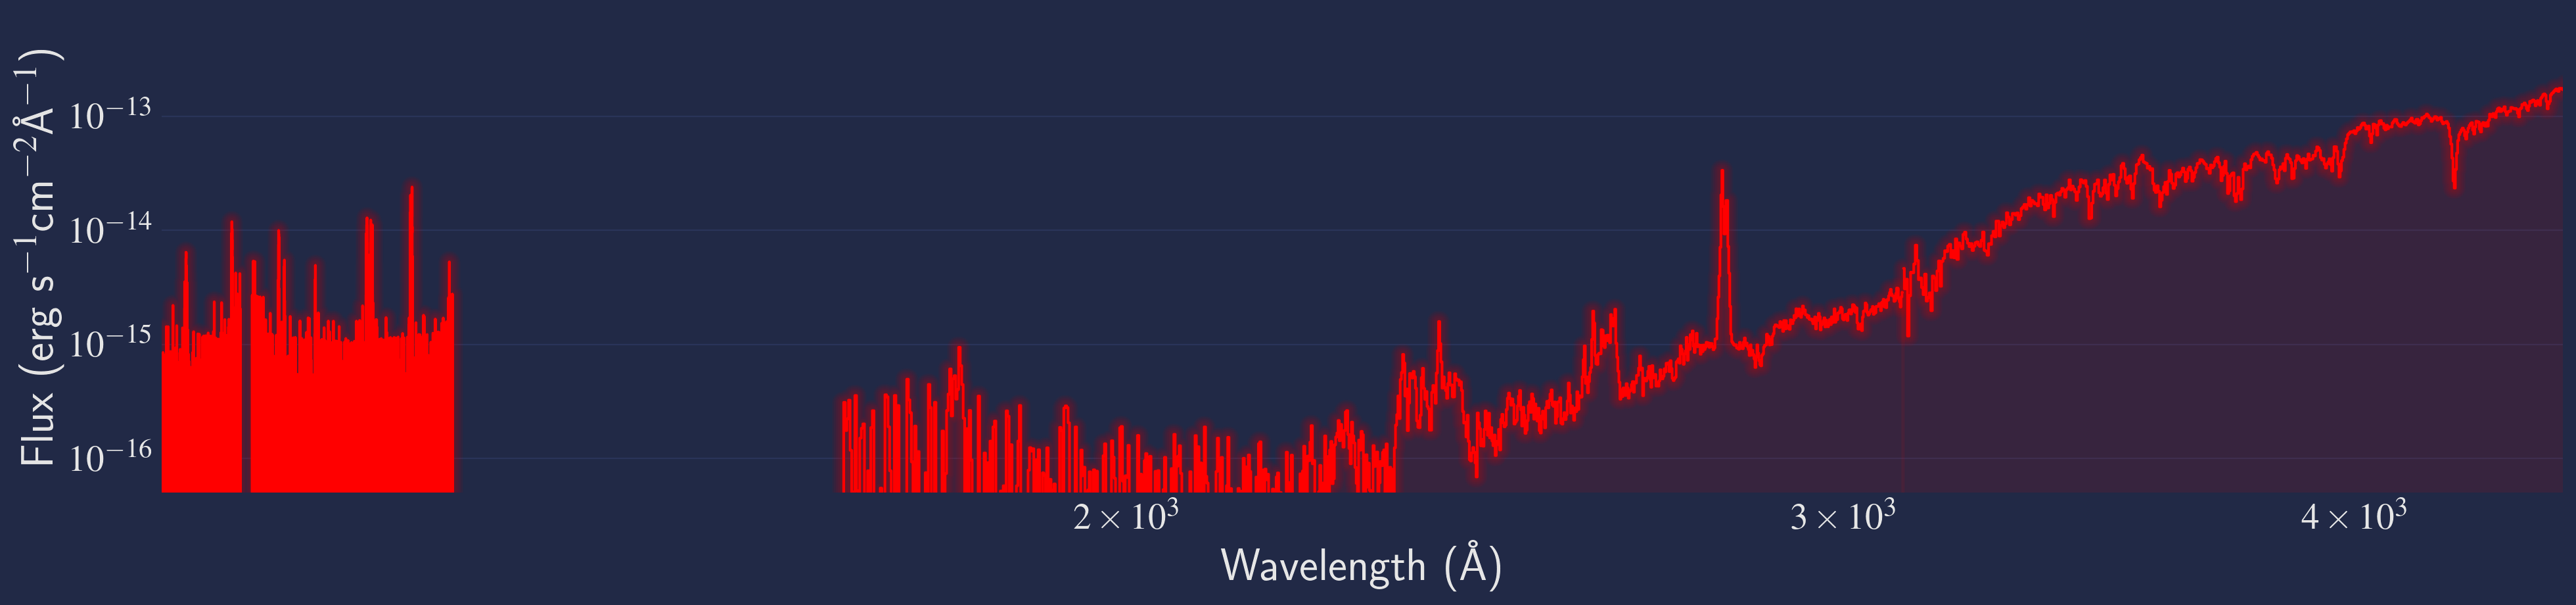

In [40]:
# fig, ax = plt.subplots(figsize=(20, 5))

# cuts = [[3100, 5690], [1000, 2000], [1160, 2000], [1700, 3100]]

# for i, spec in enumerate(obs):
#     data = fits.getdata(spec, 1)
#     w, f = data['WAVELENGTH'], data['FLUX']
#     mask = (w > cuts[i][0]) & (w < cuts[i][1])
#     w, f = w[mask], f[mask]
#     mask = (w > cuts[i][0]) & (w < cuts[i][1])
#     w, f = w[mask], f[mask]
#     ax.step(w, f, where='mid', c='C4')
    
# ax.set_yscale('log')
# ax.set_xscale('log')

# ax.set_ylim(5e-17, 8e-13)
# ax.set_xlim(1160, 4500)
# ax.set_xlabel('Wavelength (\AA)', size=25)
# ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
# # ax.axis('off')
# # ax.set_title('GJ 367', size=30)
# mplcyberpunk.add_glow_effects()

# fig.tight_layout()
# fig.savefig('plots/aas_talk/gj367_obs.png')

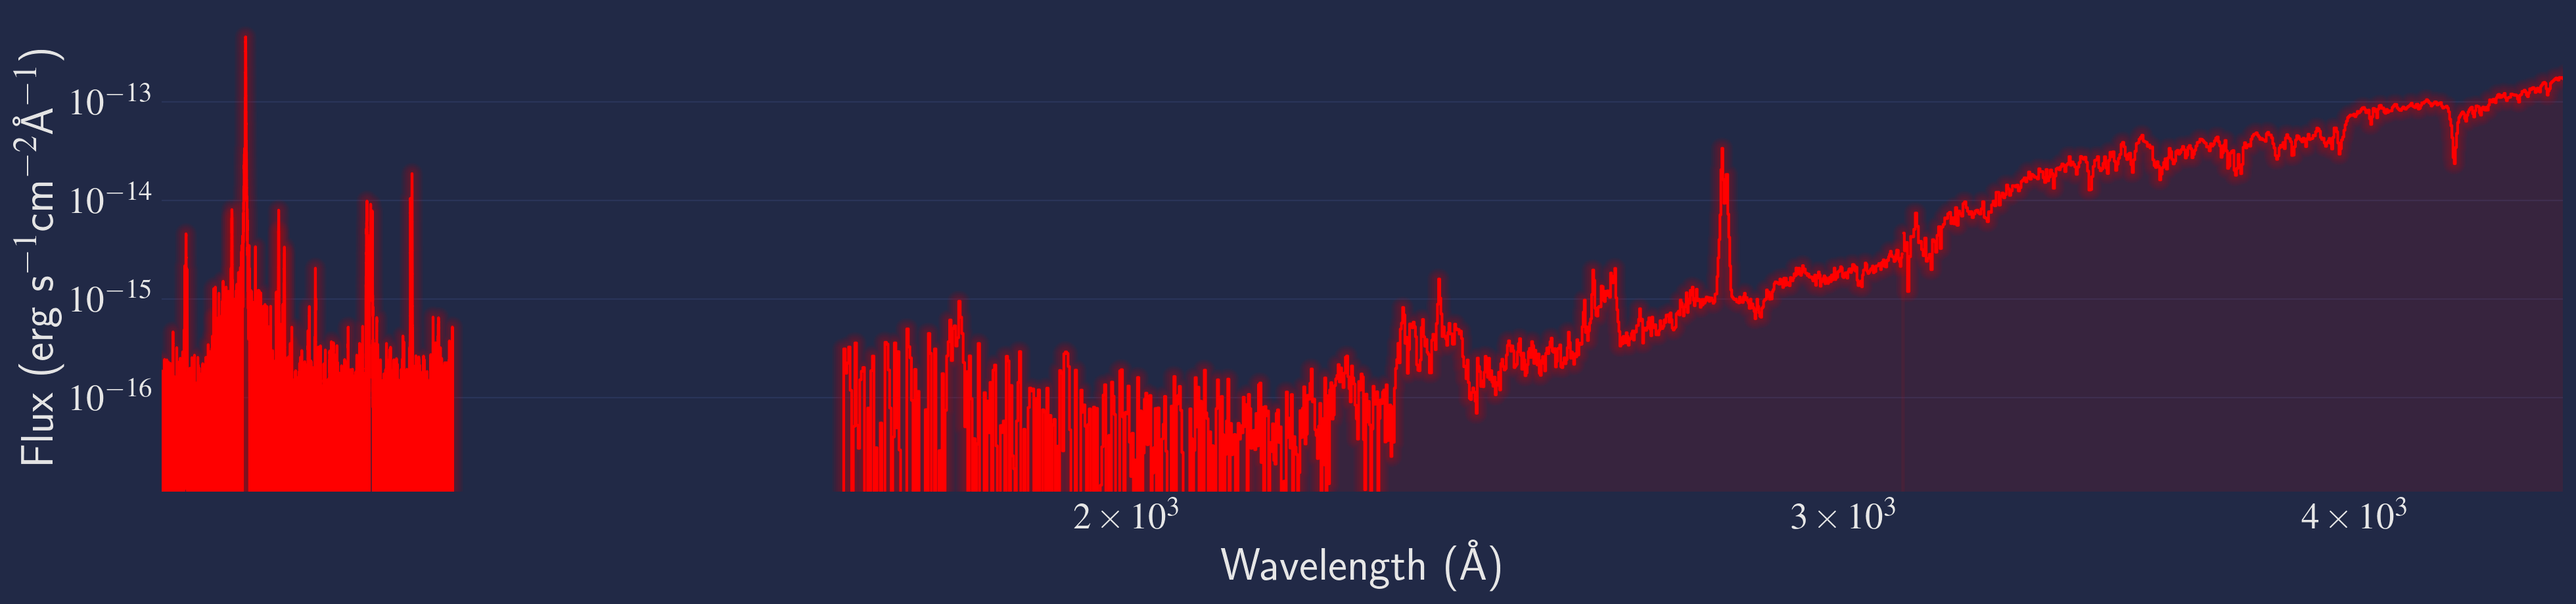

In [52]:
fig, ax = plt.subplots(figsize=(20, 5))


cuts = [[3100, 5690], [1000, 2000], [1160, 2000], [1700, 3100]]

for i, spec in enumerate(obs):
    data = fits.getdata(spec, 1)
    w, f = data['WAVELENGTH'], data['FLUX']
    if i == 2:
        f = convolve(f,  Box1DKernel(10))
    mask = (w > cuts[i][0]) & (w < cuts[i][1])
    w, f = w[mask], f[mask]
    mask = (w > cuts[i][0]) & (w < cuts[i][1])
    w, f = w[mask], f[mask]
    ax.step(w, f, where='mid', c='C4')
    
proxy_path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_hst_stis_gj674_g140l_v24_component-spec.fits'
d_prox = 4.55
d_star = 9.42
scale = (d_prox/d_star)**2  
data = fits.getdata(proxy_path, 1)
w, f = data['WAVELENGTH'], data['FLUX']

mask = (w > 1367) & (w <1700)
w, f, = w[mask], f[mask]
# ax.step(w, f*scale, where='mid', c='C3')


ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1.1e-17, 8e-13)
ax.set_xlim(1160, 4500)
ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
# ax.axis('off')
# ax.set_title('GJ 367', size=30)
mplcyberpunk.add_glow_effects()

fig.tight_layout()
fig.savefig('plots/aas_talk/gj367_obs.png')

In [53]:
mods = [
 'draft_hlsp/gj_367/hlsp_muscles_model_lya_gj_367_na_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_model_apec_gj_367_na_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_model_phx_gj_367_na_v1_component-spec.fits',
 'draft_hlsp/gj_367/hlsp_muscles_model_dem_gj_367_na_v1_component-spec.fits']


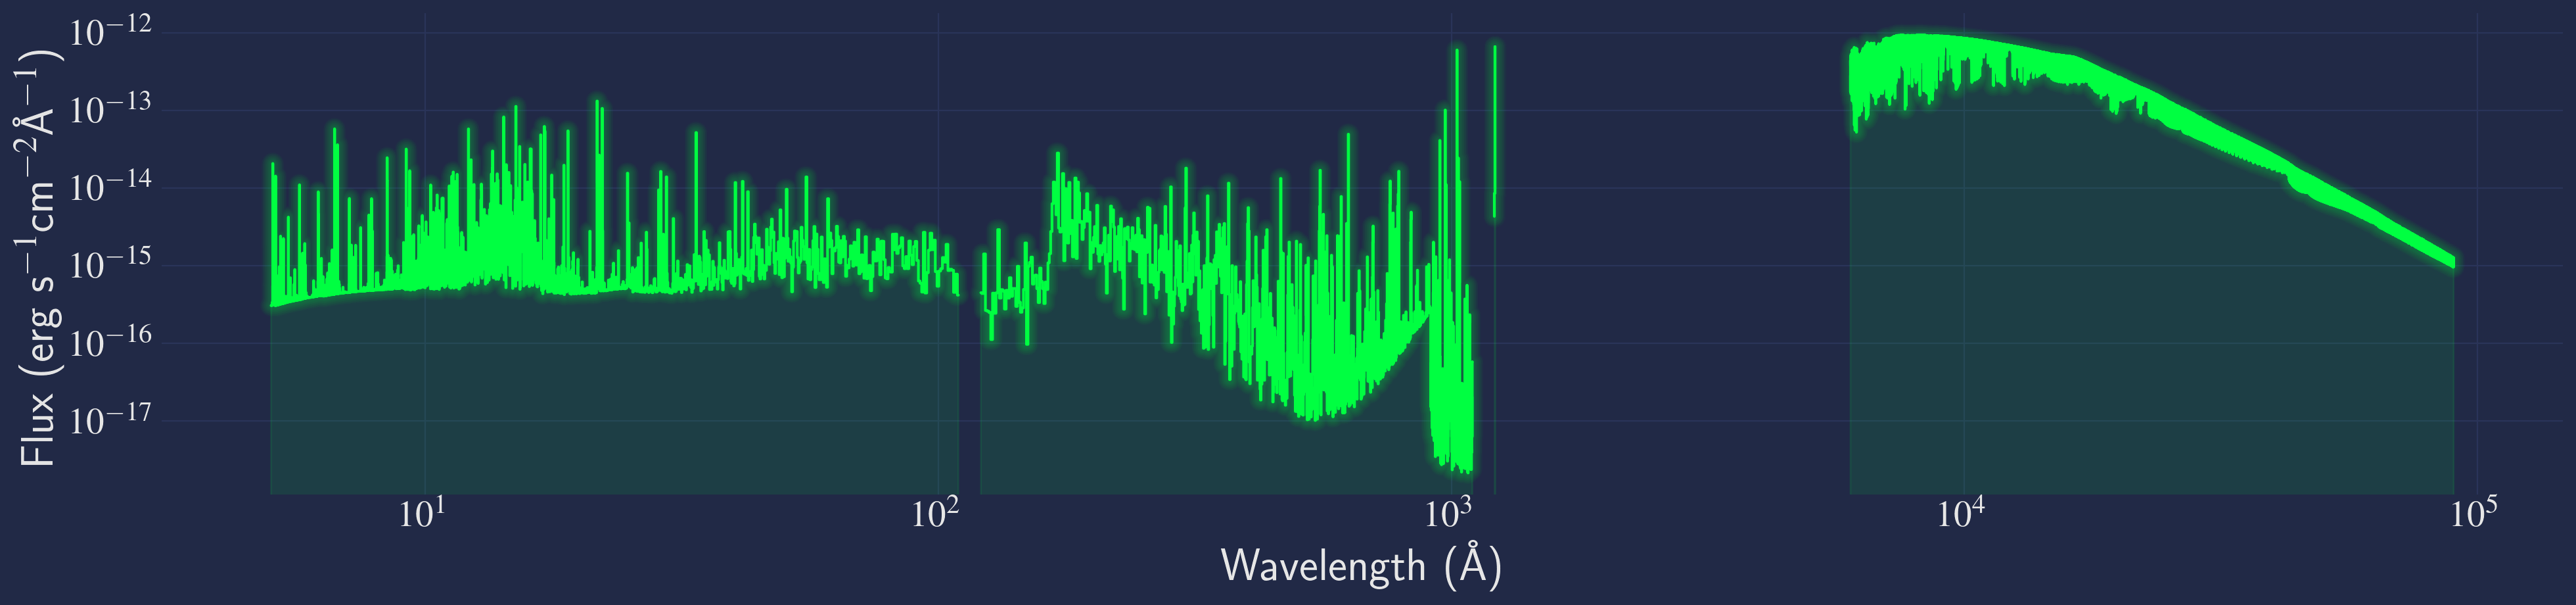

In [64]:
fig, ax = plt.subplots(figsize=(20, 5))


cuts = [[1000, 2000], [0, 110], [6000, 9e4], [120, 1100]]

for i, spec in enumerate(mods):
    data = fits.getdata(spec, 1)
    w, f = data['WAVELENGTH'], data['FLUX']
    if i == 2:
        norm = fits.getheader(spec)['NORMFAC']
        f *= norm
        # f = convolve(f,  Box1DKernel(10))
    mask = (w > cuts[i][0]) & (w < cuts[i][1])
    w, f = w[mask], f[mask]
    ax.step(w, f, where='mid', c='C3')
    


ax.set_yscale('log')
ax.set_xscale('log')

# ax.set_ylim(1.1e-17, 8e-13)
# ax.set_xlim(1160, 4500)
ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
# ax.axis('off')
# ax.set_title('GJ 367', size=30)
mplcyberpunk.add_glow_effects()

fig.tight_layout()
fig.savefig('plots/aas_talk/gj367_mods.png')

In [66]:
path2 = 'draft_hlsp/wasp-63/'
hlsp2 = glob.glob('{}*.fits'.format(path2))
hlsp2

['draft_hlsp/wasp-63/hlsp_muscles_multi_multi_wasp-63_broadband_v2_var-res-sed.fits',
 'draft_hlsp/wasp-63/hlsp_muscles_hst_stis_wasp-63_g230l_v2_component-spec.fits',
 'draft_hlsp/wasp-63/hlsp_muscles_multi_multi_wasp-63_broadband_v2_const-res-sed.fits',
 'draft_hlsp/wasp-63/hlsp_muscles_mod_phx_wasp-63_na_v2_component-spec.fits',
 'draft_hlsp/wasp-63/hlsp_muscles_hst_stis_wasp-63_g430l_v2_component-spec.fits',
 'draft_hlsp/wasp-63/hlsp_muscles_mod_sol_wasp-63_na_v2_component-spec.fits']

In [67]:
sed2 = fits.getdata(hlsp2[0], 1)

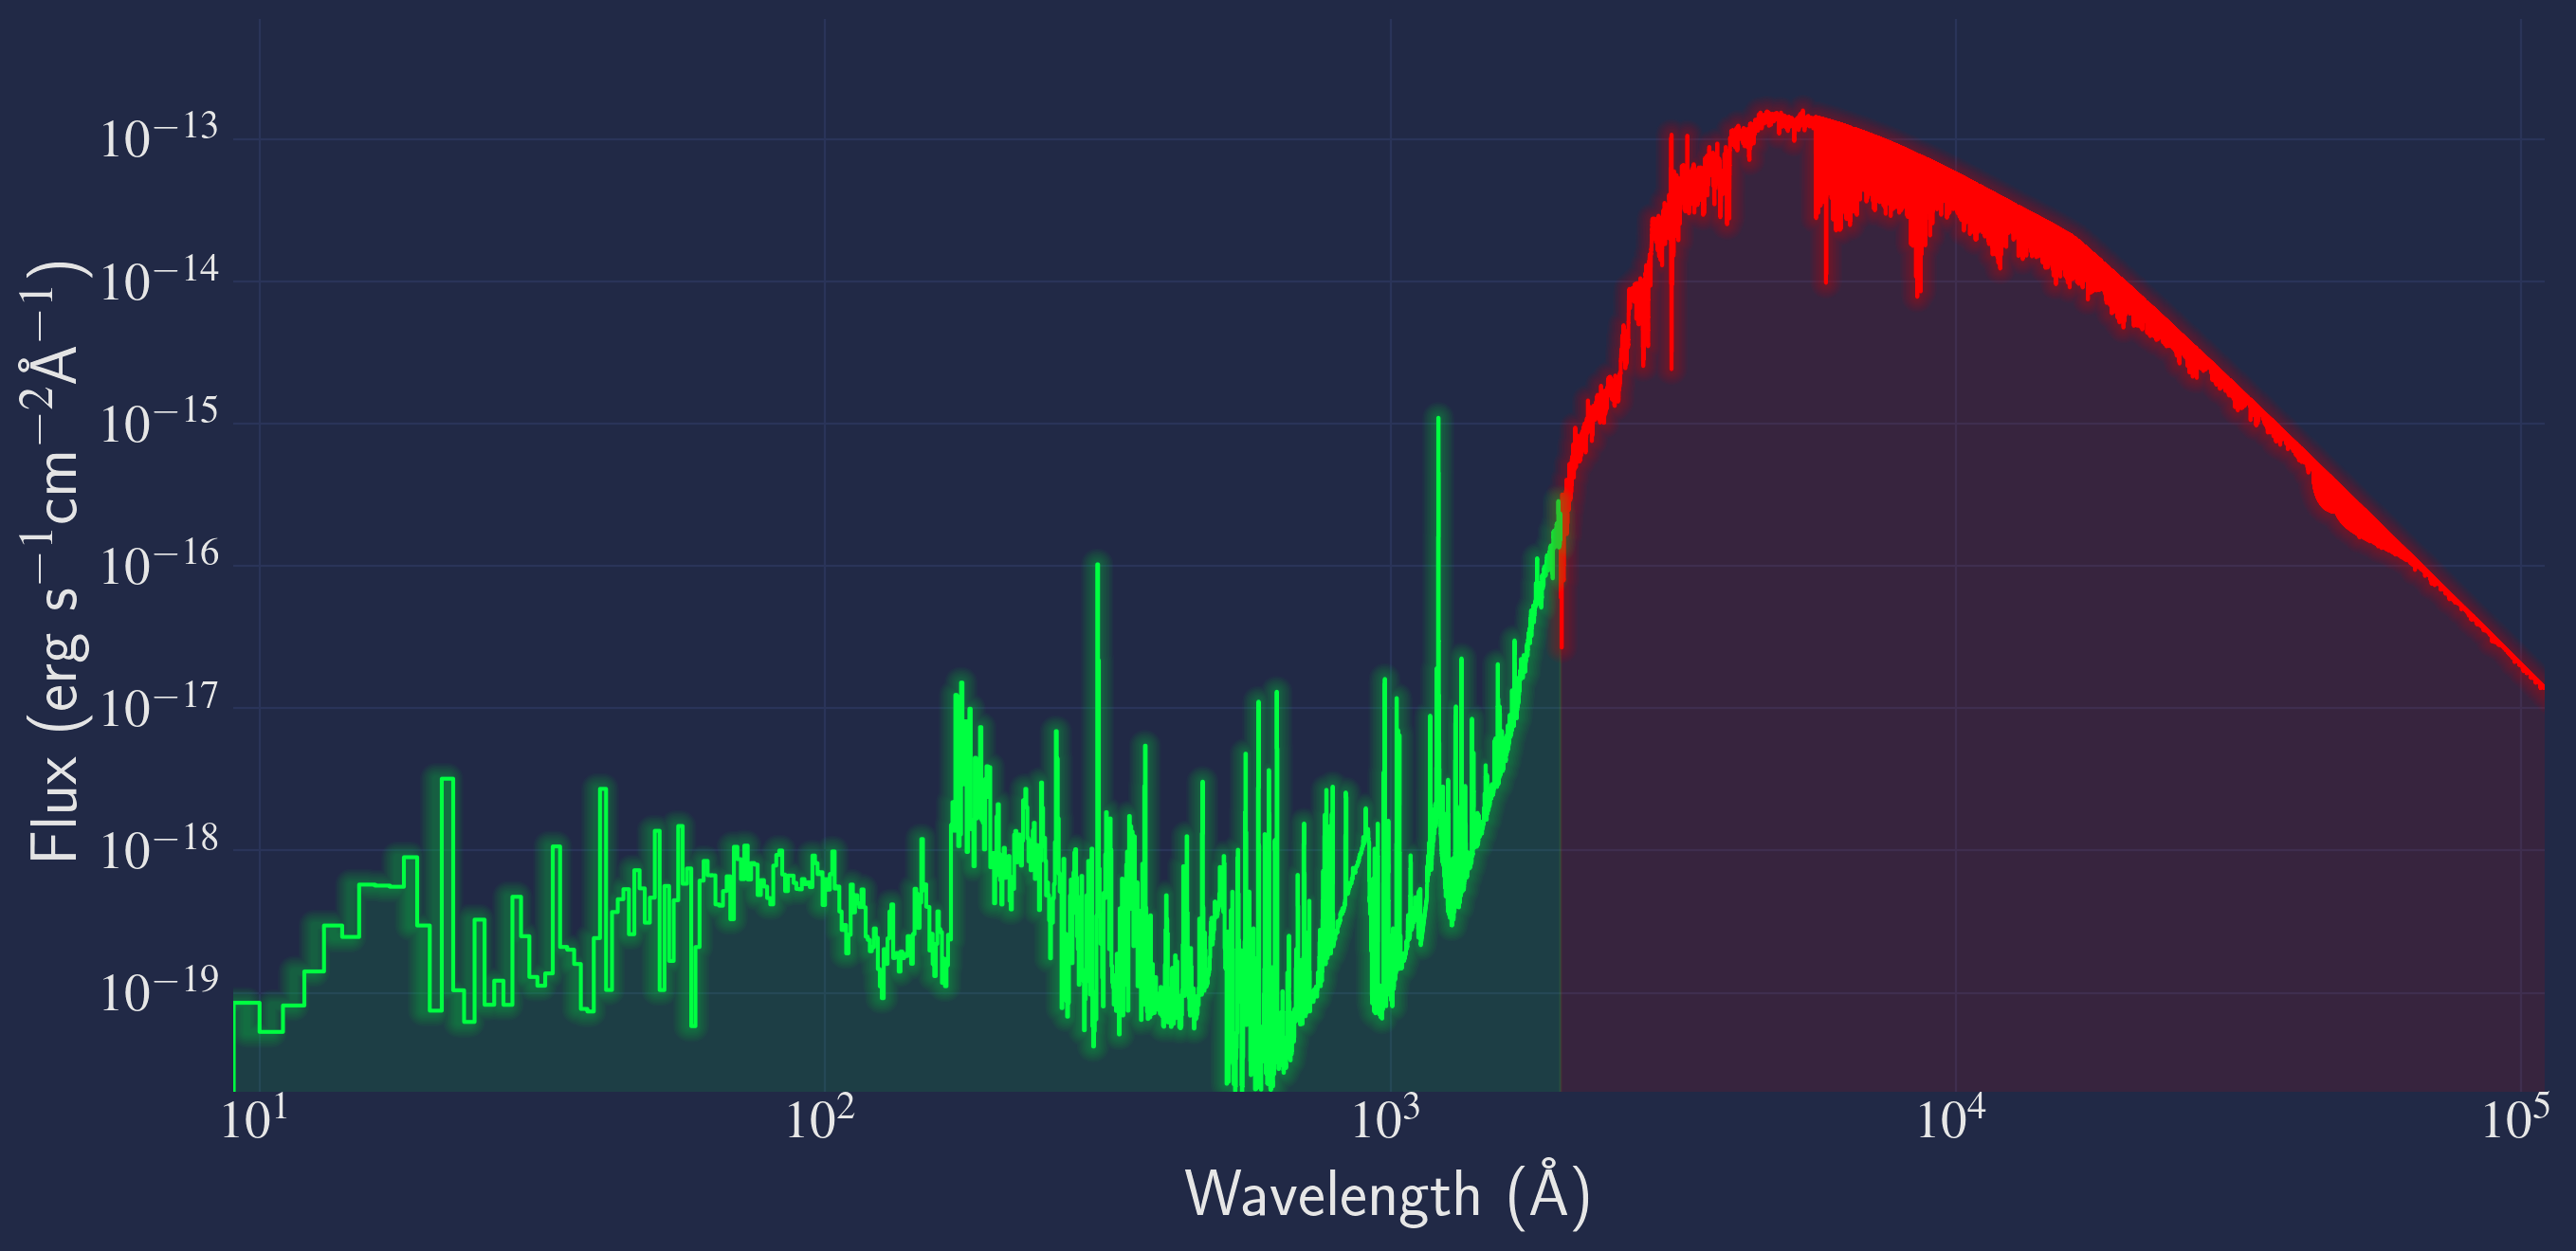

In [73]:
fig, ax = plt.subplots(figsize=(14, 7))

# ax.plot(sed['WAVELENGTH'], sed['FLUX'], c='C4')

mask1 = sed2['WAVELENGTH'] > 2000
ax.step(sed2['WAVELENGTH'][mask1], sed2['FLUX'][mask1], c='C4', where='mid')


mask2 = sed2['WAVELENGTH'] < 2000
ax.step(sed2['WAVELENGTH'][mask2], sed2['FLUX'][mask2], c='C3', where='mid')


ax.set_yscale('log')
ax.set_xscale('log')

# ax.axvline(110, ls='--')
# ax.axvline(900, ls='--')
# ax.axvline(4000, ls='--')



bar_y = 2e-12
label_y = bar_y*1.5
e_y = bar_y *0.3
# ax.annotate('X-ray' ,(20, label_y), size=25)
# ax.annotate('EUV' ,(250, label_y), size=25)
# ax.annotate('Ultraviolet' ,(1200, label_y), size=25)
# ax.annotate('Optical/IR' ,(6000, label_y), size=25)

# plt.legend(fontsize=25, loc=4,frameon=True)

mplcyberpunk.add_glow_effects()
# mplcyberpunk.make_lines_glow()
# mplcyberpunk.add_underglow()
ax.set_ylim(2e-20, 7e-13)
ax.set_xlim(9, 1.1e5)
ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
# ax.set_title('GJ 367', size=30)
fig.tight_layout()
fig.savefig('plots/aas_talk/wasp63_sed_prox.png')
